In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
cab_data = pd.read_csv("/content/Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_data.shape

(359392, 7)

In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


We need to change the data type of column - "Date of Travel" from int64 to Date.

In [5]:
dates_list = cab_data['Date of Travel'].to_list()
base_date = pd.Timestamp('1900-01-01')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in dates_list]
cab_data['Date of Travel'] = pd.to_datetime(dates, format='%Y/%m/%d %H:%M:%S.%f')

In [6]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [8]:
city = pd.read_csv("/content/City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
city.shape

(20, 3)

In [10]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [11]:
city['Population'] = city.Population.str.strip(' ').str.replace(',', '')

city['Users'] = city.Users.str.strip(' ').str.replace(',', '')

In [12]:
city['Population'] = city['Population'].astype(int)

city['Users'] = city['Users'].astype(int)

In [13]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [14]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [15]:
Customer_ID = pd.read_csv("/content/Customer_ID.csv")
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
Customer_ID.shape

(49171, 4)

In [17]:
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
Customer_ID.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [19]:
Transaction_ID = pd.read_csv("/content/Transaction_ID.csv")
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [20]:
Transaction_ID.shape

(440098, 3)

In [21]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [22]:
final_df = cab_data.merge(Transaction_ID, on= 'Transaction ID').merge(Customer_ID, on ='Customer ID').merge(city, on = 'City')

In [23]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [25]:
company_counts = final_df['Company'].value_counts()


In [26]:
company_counts

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [27]:
company_df = final_df['Company'].to_frame(name='Company')

In [28]:
company_df.head()

,Company
0,Pink Cab
1,Yellow Cab
2,Yellow Cab
3,Pink Cab
4,Yellow Cab


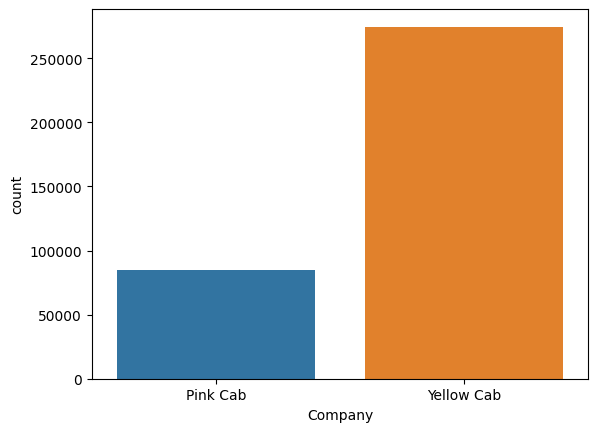

In [29]:
# count plot on single categorical variable
sns.countplot(data = company_df, x = 'Company')

# Show the plot
plt.show()

In [30]:
corr = final_df.corr()
corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


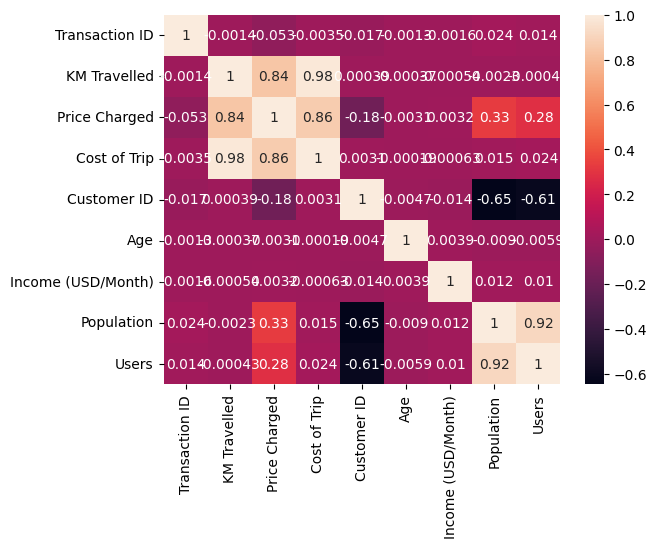

In [31]:
sns.heatmap(corr, annot=True)
plt.show()

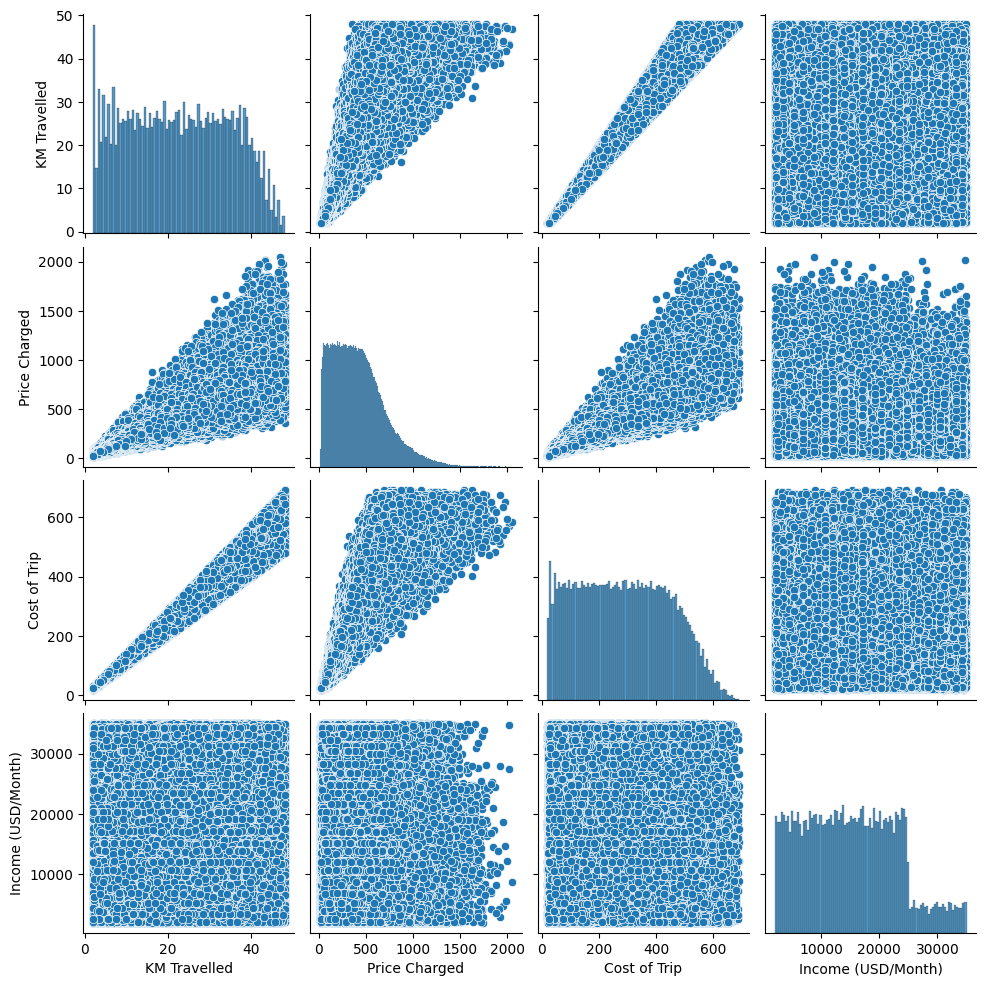

In [32]:
sns.pairplot(data=final_df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)']])
plt.show()

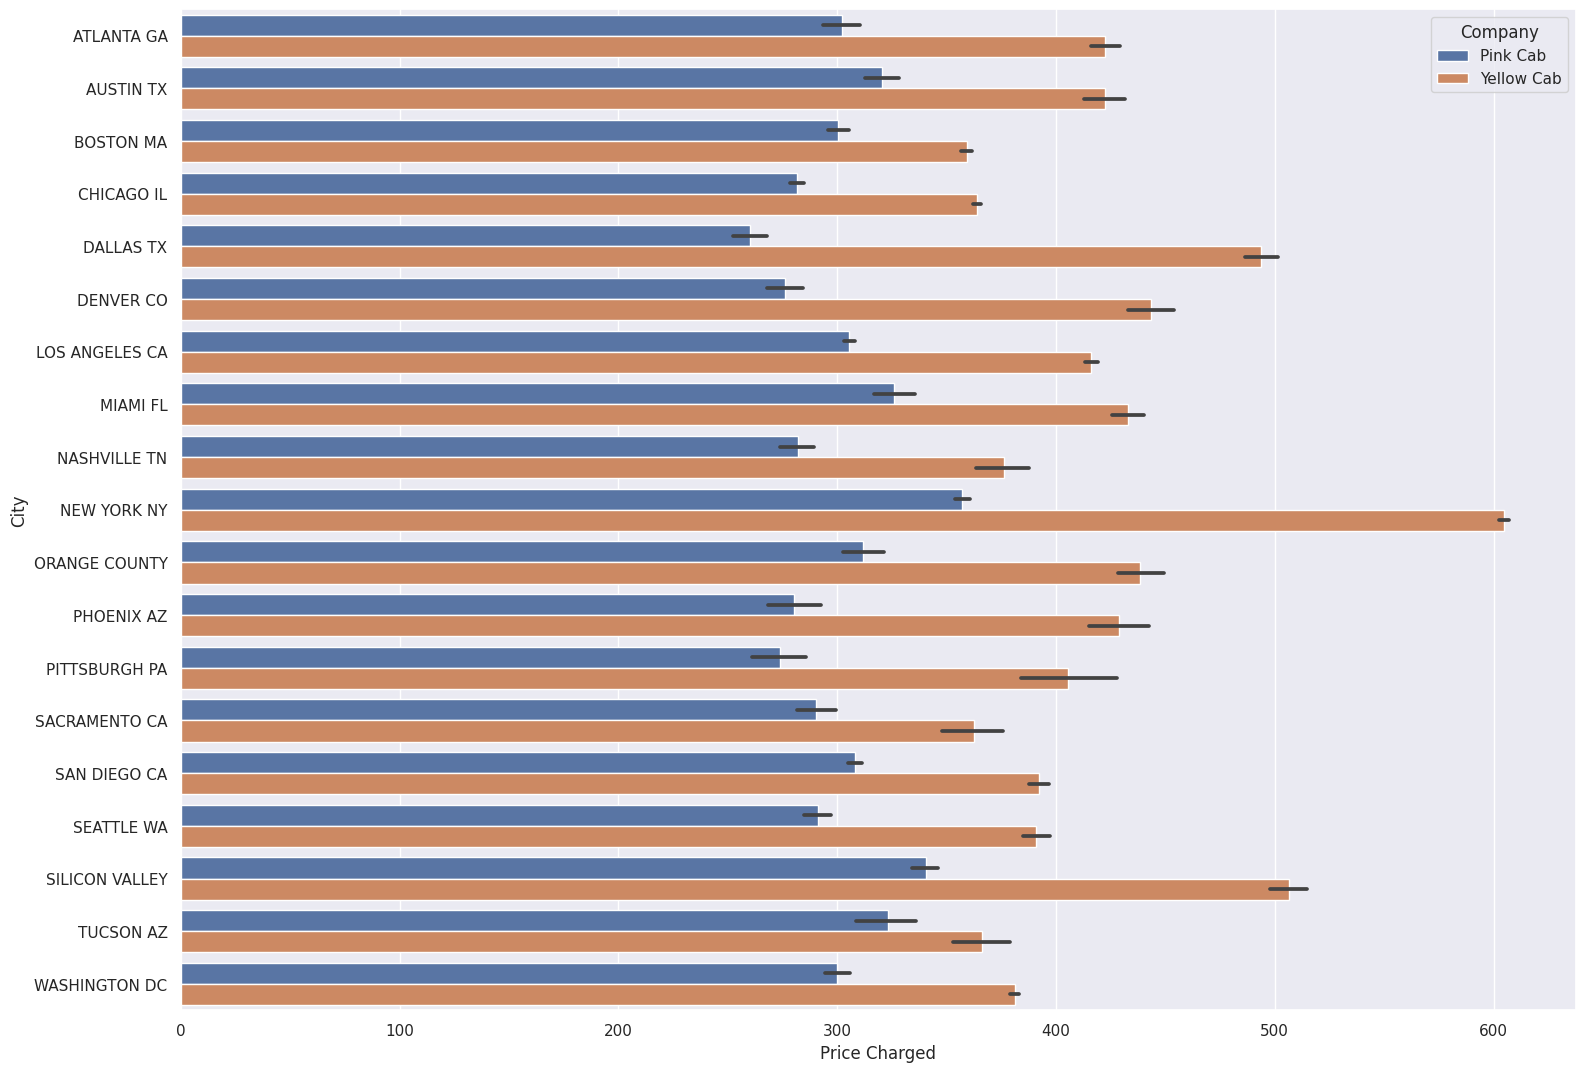

In [33]:
sns.set(rc={'figure.figsize':(18, 13)})
ax = sns.barplot(x="Price Charged", y="City", data=final_df,hue='Company')

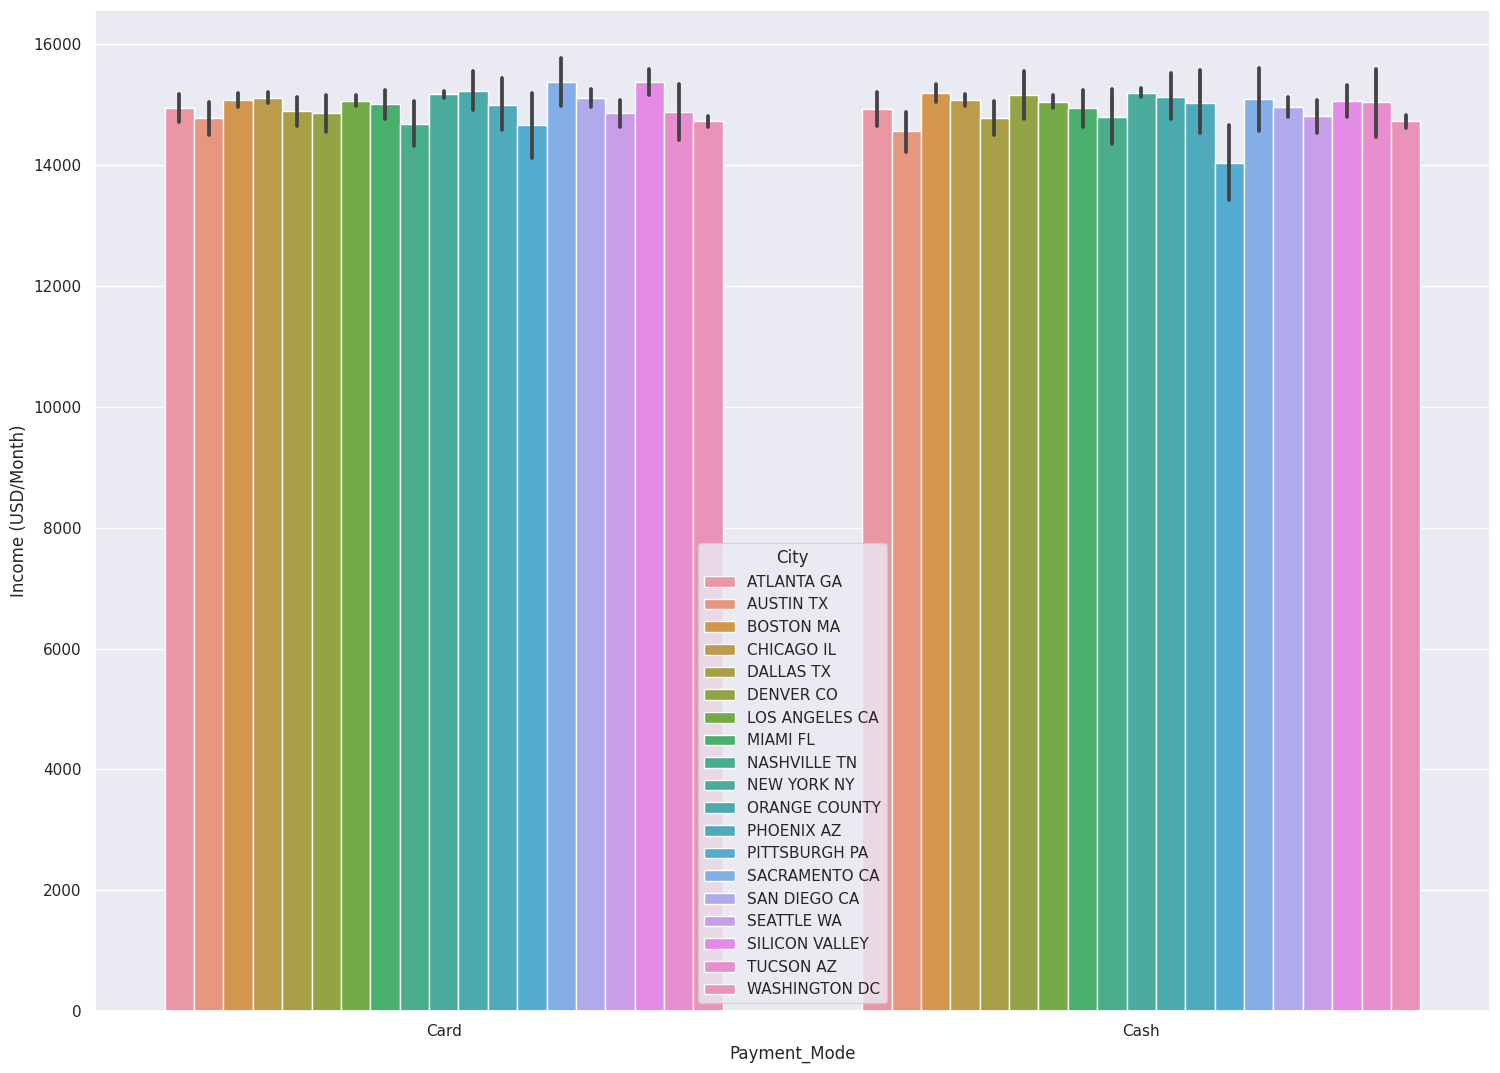

In [34]:
ax = sns.barplot(x="Payment_Mode", y="Income (USD/Month)", data=final_df, hue='City')

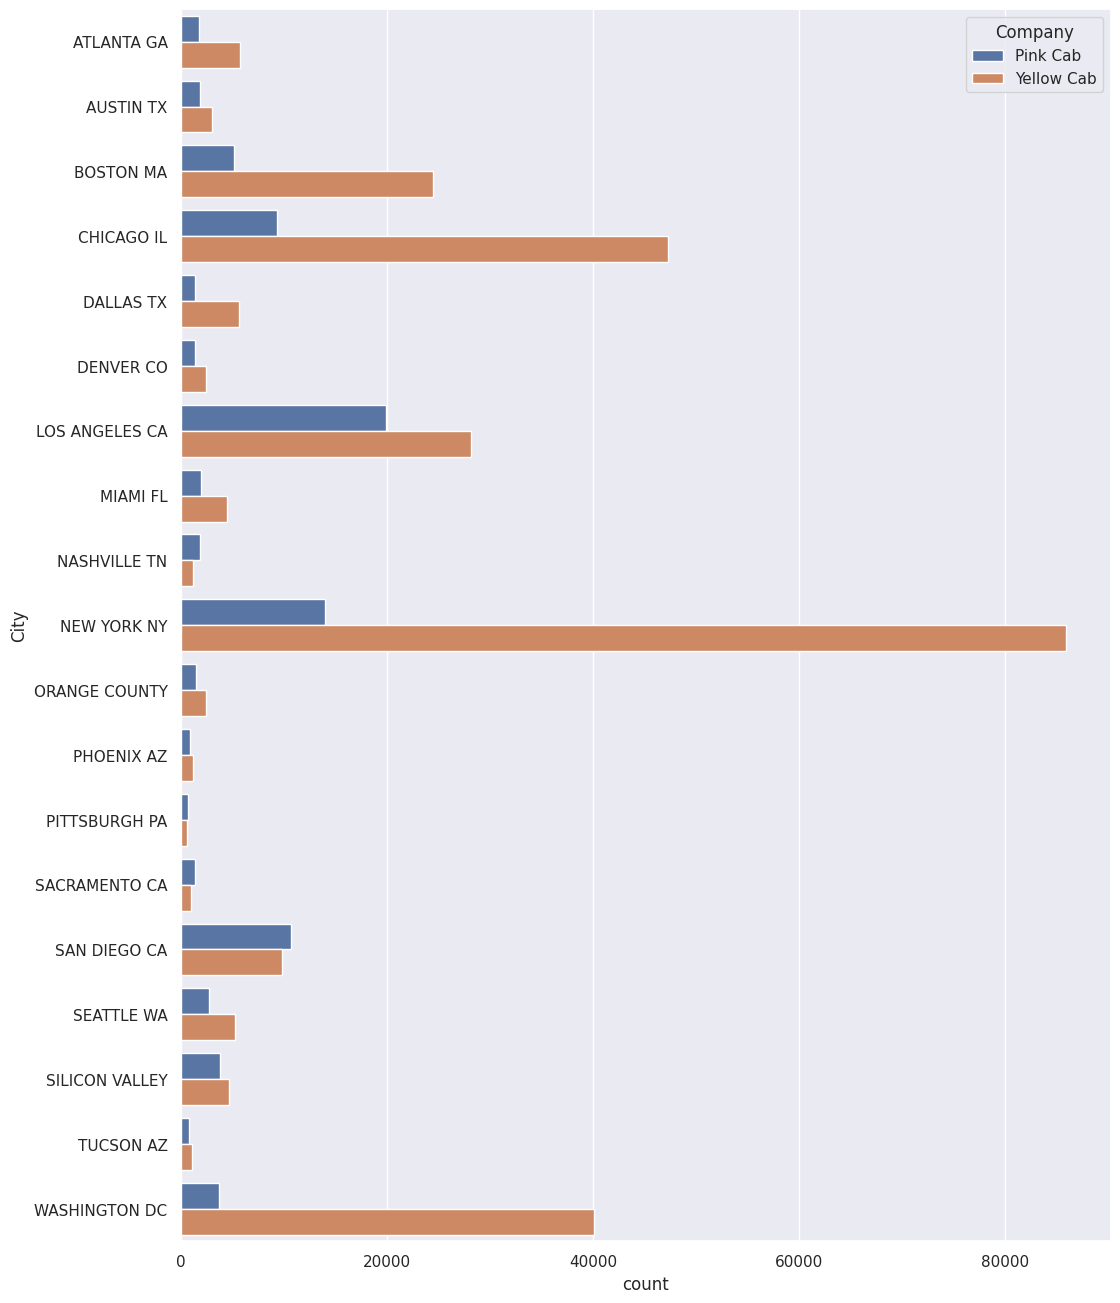

In [35]:
f, ax = plt.subplots(figsize=(12, 16))
ax = sns.countplot(y='City', hue='Company', data=final_df)
plt.show()

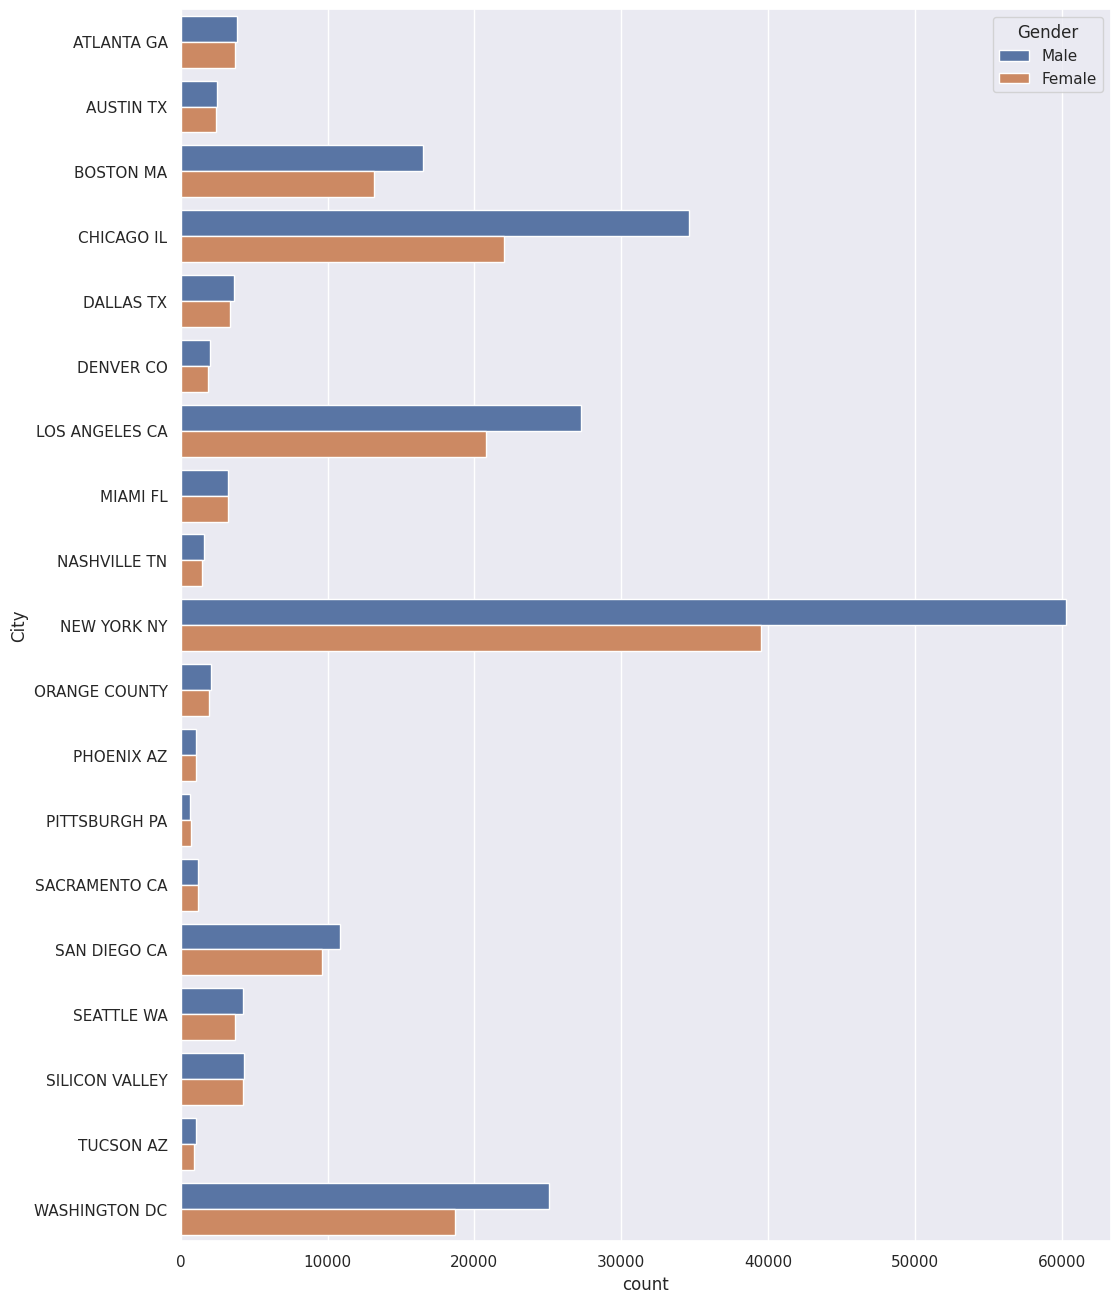

In [36]:
f, ax = plt.subplots(figsize=(12, 16))
ax = sns.countplot(y='City', hue='Gender', data=final_df)
plt.show()

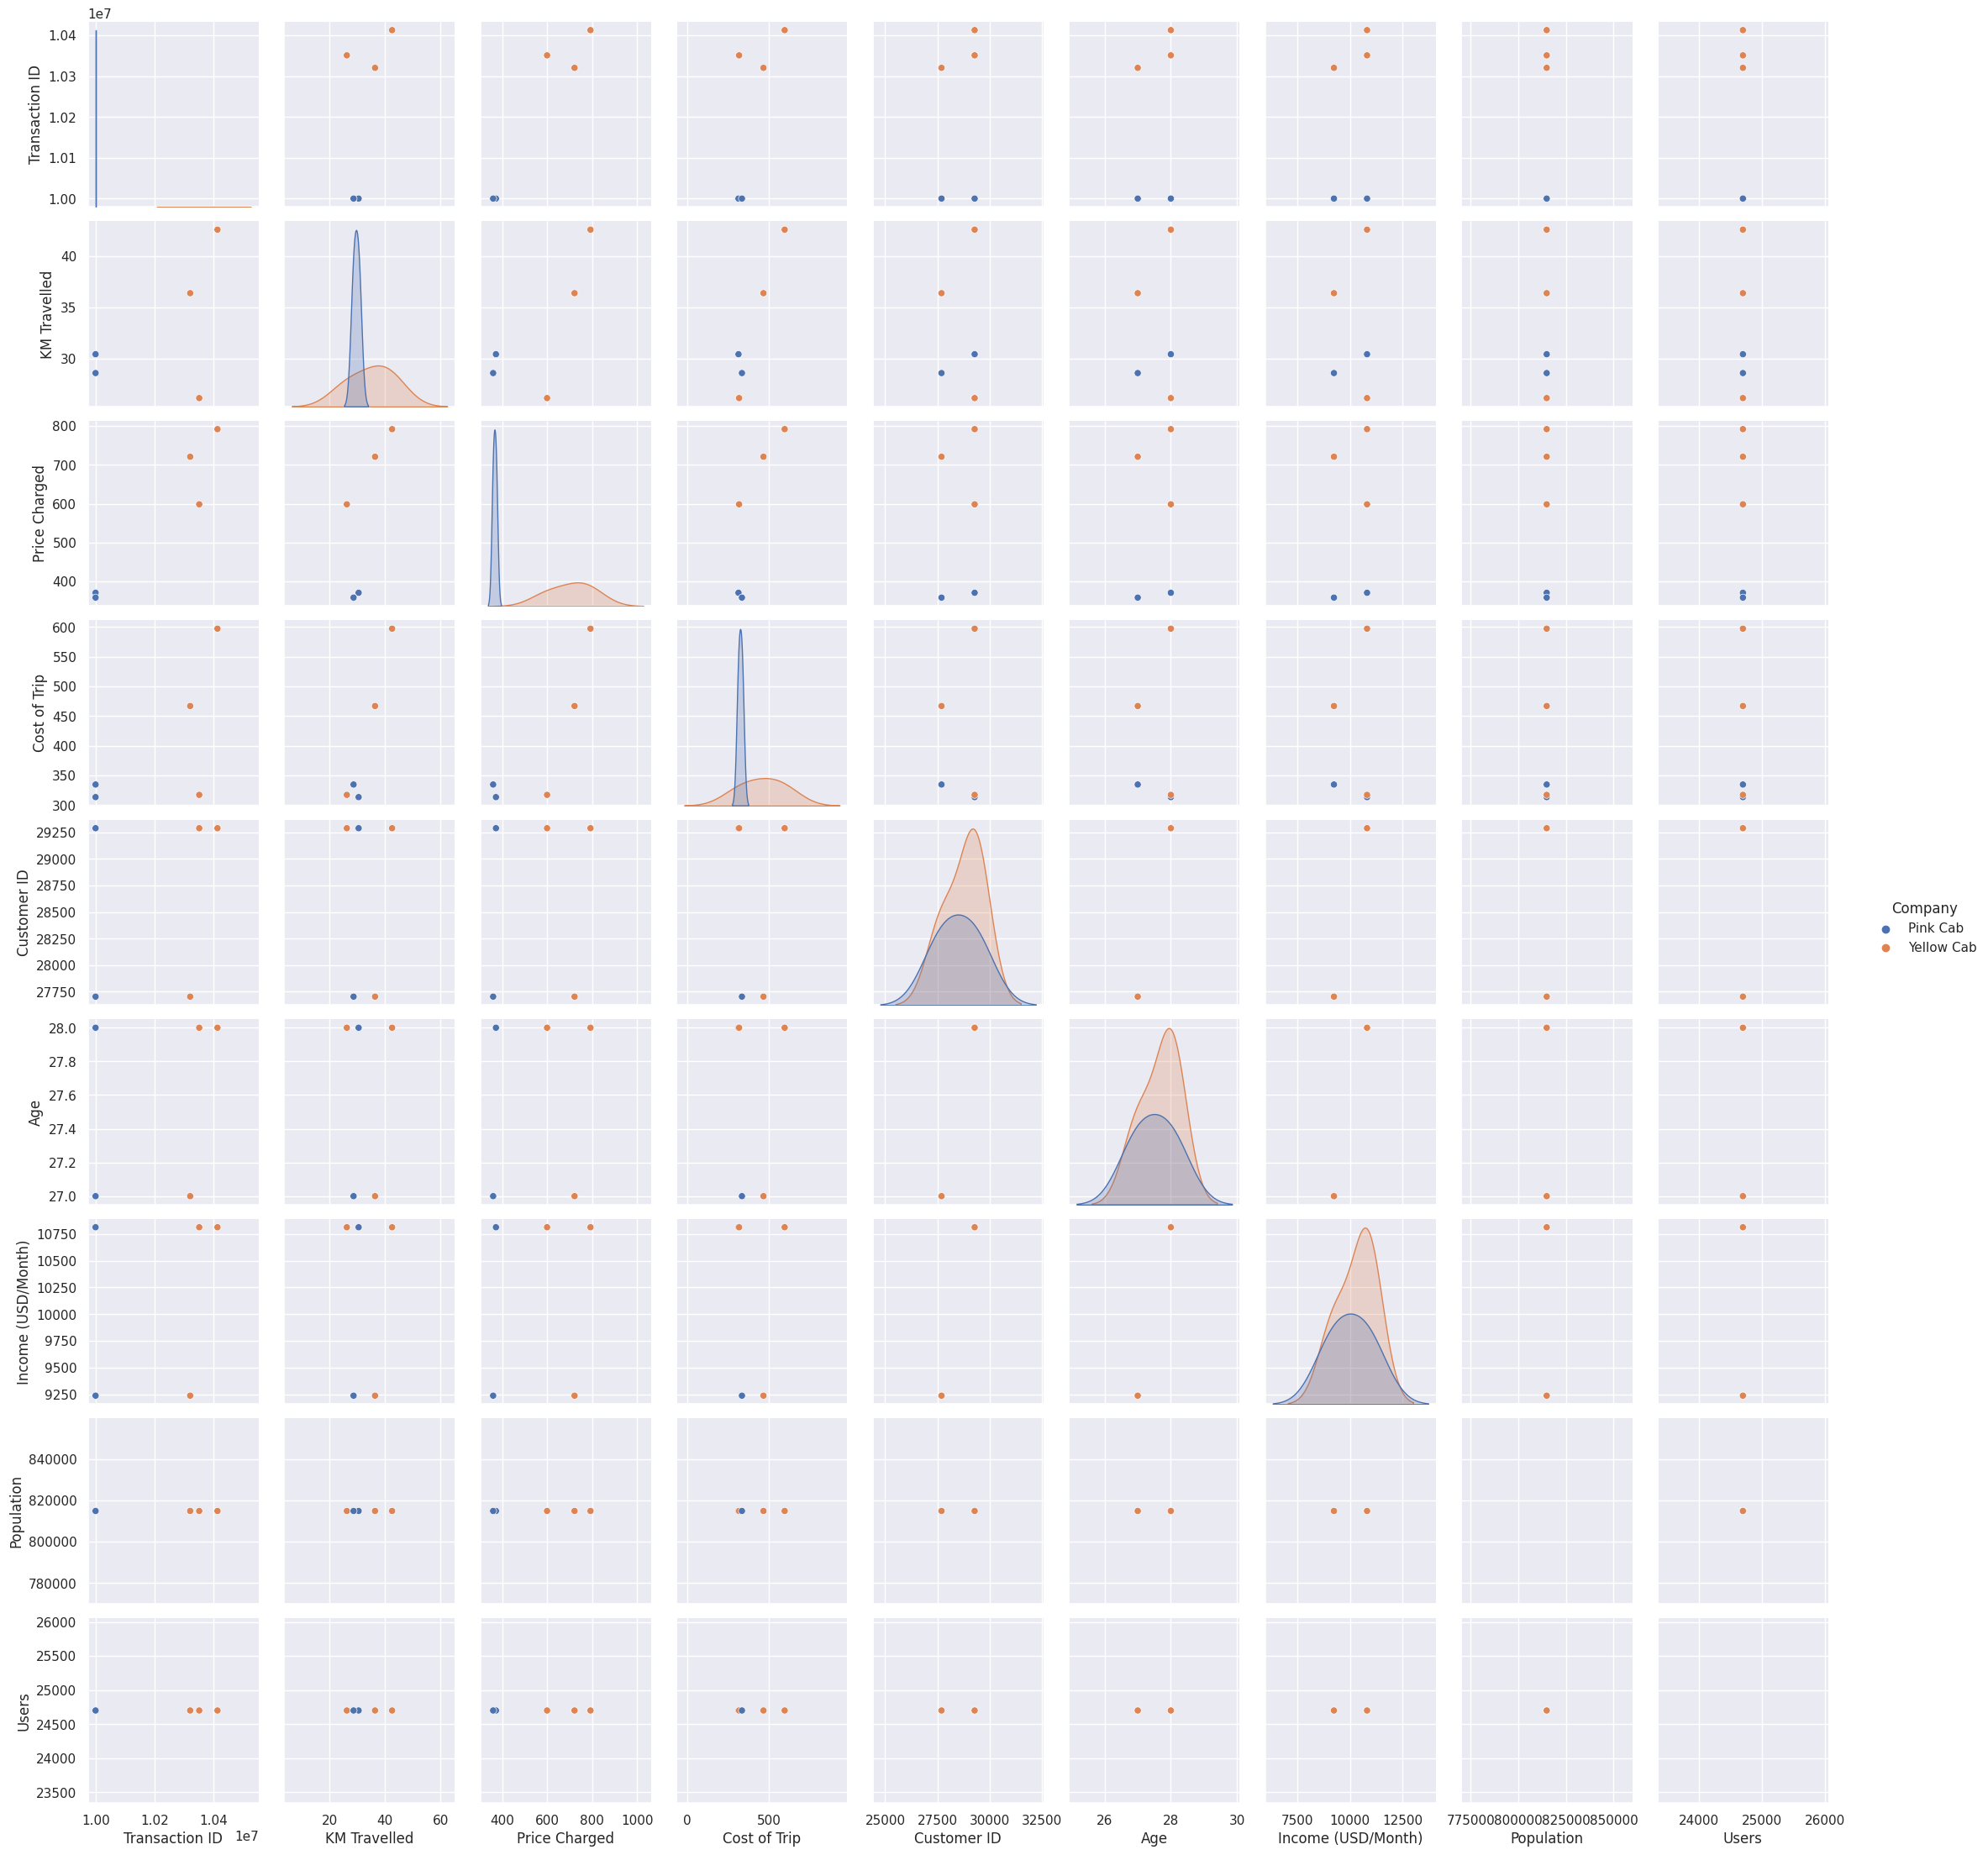

In [37]:
sns.pairplot(final_df.head(), hue = 'Company')

<Axes: >

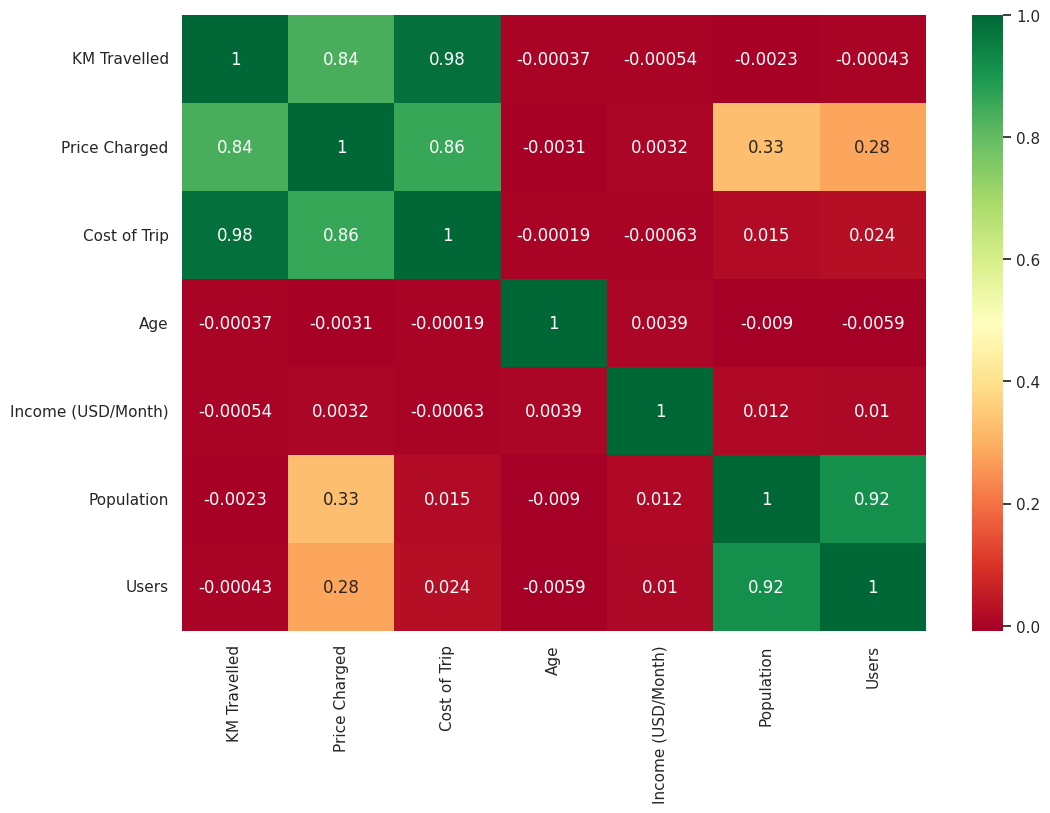

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(final_df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']].corr(), annot=True, cmap="RdYlGn", ax=ax)

<Axes: title={'center': 'Total no. of Transactions by Payment Mode'}, xlabel='Company', ylabel='count'>

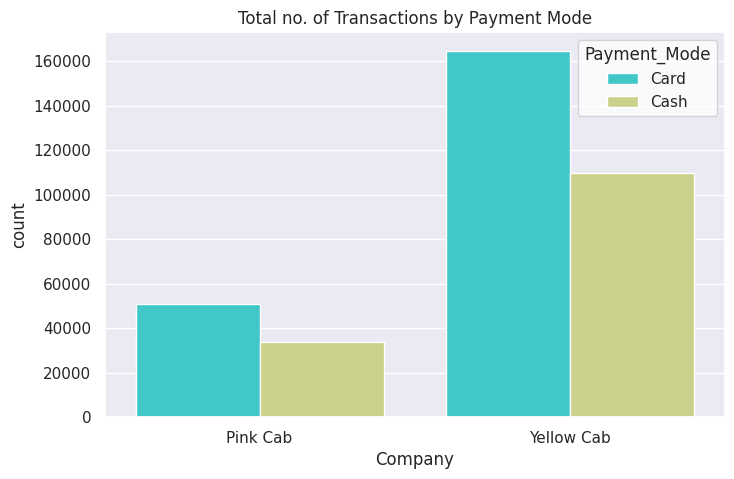

In [39]:
fig = plt.figure(figsize=(8, 5))

plt.title("Total no. of Transactions by Payment Mode")
sns.set_style("whitegrid")
sns.countplot(x="Company", hue="Payment_Mode", data=final_df, orient="h", palette="rainbow")

<Axes: title={'center': 'Total no. of Transactions by City'}, xlabel='Gender', ylabel='count'>

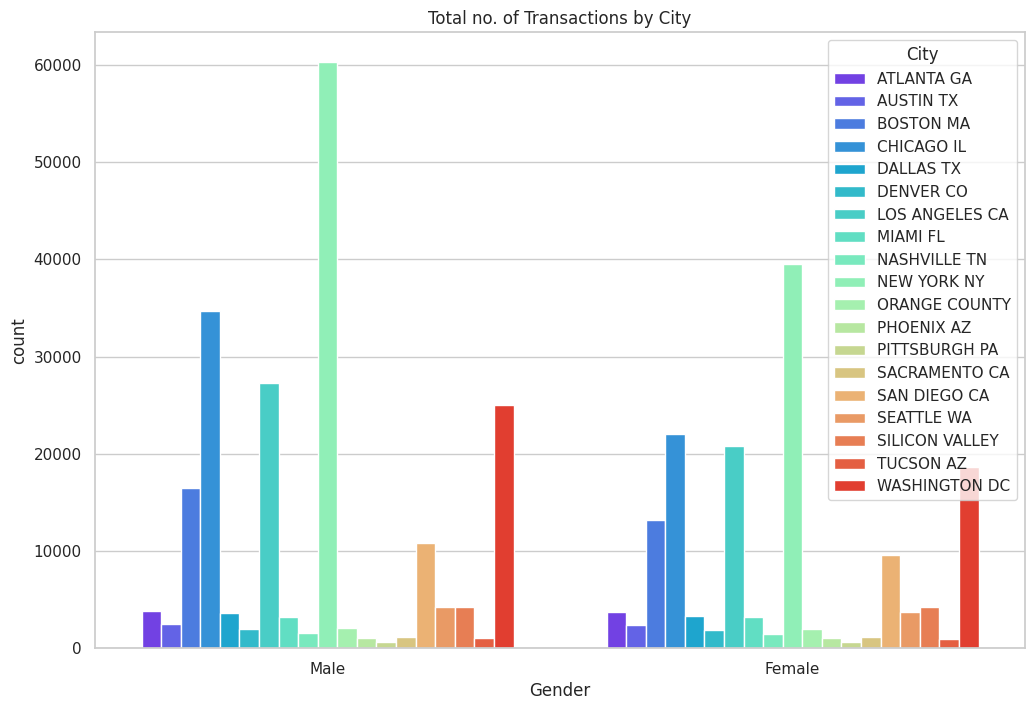

In [40]:
fig = plt.figure(figsize=(12, 8))

plt.title("Total no. of Transactions by City")
sns.set_style("whitegrid")
sns.countplot(x="Gender", hue="City", data=final_df, orient="h", palette="rainbow")

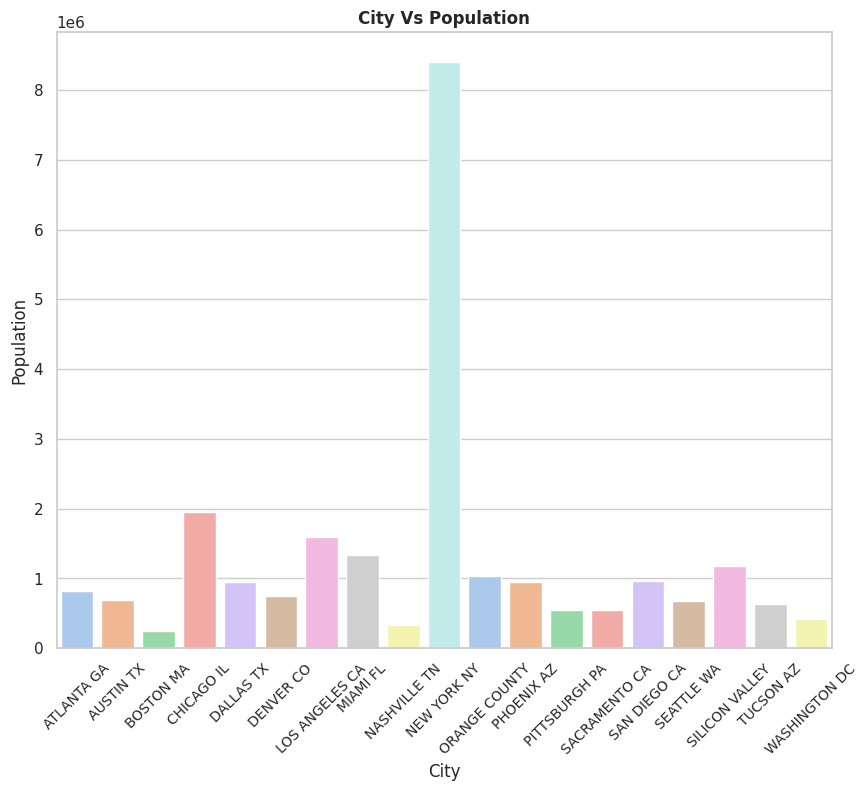

In [41]:
f = plt.figure(figsize=(10,8))
plt.title("City Vs Population",fontweight='bold')
sns.set_style("whitegrid")
sns.barplot(x="City", y="Population", data=final_df, palette="pastel")
plt.xticks(rotation=45, fontsize=10)
plt.show()

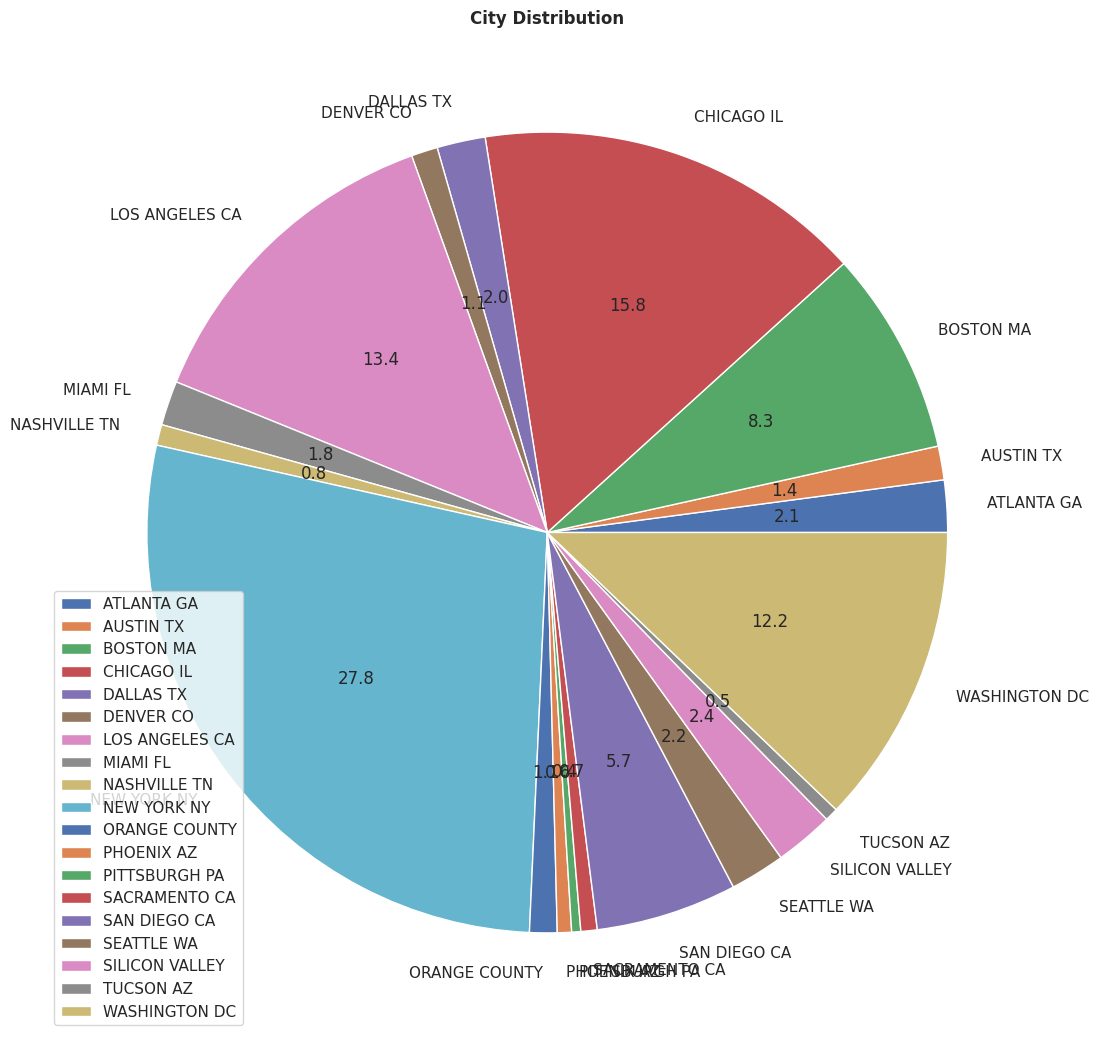

In [42]:
plt.figure(figsize=(15,13))
data = final_df["City"]
data = pd.DataFrame(data, columns = ["City"])
data = data.groupby(by="City").size()

labels = final_df["City"].drop_duplicates(keep="first")

plt.title("City Distribution", fontweight="bold")
plt.pie(data, labels = labels, autopct='%.1f')
plt.legend(loc="best")
plt.show()